In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
%matplotlib inline
plt.style.use('seaborn-dark-palette')

## Introduction

There are many methods for detecting exoplanets, most of them are indirect, meaning that we do not detect the exoplanet directly but instead we see the effect that the presence of an exoplanet has in the signal we get from the star. It can be present in its radial velocity (RV method), brightness (transits or microlensing), movement in the sky (astrometry). And for some particular cases we can image the exoplanets directly, these must be very wide orbit and massive planets. 
We know more than five thousand planets at the moment, but the parameter distribution it's not very representative of the real population because the available methods have several biases. However, there is a region of the parameter space (period, radius and mass) that shows a void of members where the observational biases are not a problem. This is known as the "Neptunian desert", defined in a paper by Mazeh et al. (2016). This are planets with small orbits and radius in the range of Neptune. 
It's supposed that these planets lose their atmospheres rapidly by photoevaporation, so we only find planets the size of Earth (exposed cores) or big as Jupiter, where photoevaporation it's not that efficient.
Detecting these planets it's important for planetary formation models. The idea of these short proyect is to predict the radius of the planets that have known period and mass but no radius, using other stellar and planetary parameters as features. 

### Data acquisition
We download the dataset from exoplanetarchive.ipac.caltech.edu and then read and save it to a pandas DatafFrame.

In [32]:
exo = pd.read_csv('/home/juan/Documents/Machine Learning/proyectos/exorad_predict/all_exoplanets_december4_2022.csv')

Let's take a look at our dataset

In [33]:
exo.head()

,pl_name,default_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim
0,11 Com b,1,0,326.030000,0.320000,-0.320000,0.0,1.290000,0.050000,-0.050000,...,-0.30,0.0,-0.35,0.09,-0.09,0.0,2.31,0.10,-0.10,0.0
1,11 UMi b,1,0,516.219970,3.200000,-3.200000,0.0,1.530000,0.070000,-0.070000,...,-0.69,0.0,-0.02,NaN,NaN,0.0,1.93,0.07,-0.07,0.0
2,14 And b,1,0,185.840000,0.230000,-0.230000,0.0,0.830000,NaN,NaN,...,-0.20,0.0,-0.24,0.03,-0.03,0.0,2.63,0.07,-0.07,0.0
3,14 Her b,1,0,1765.038901,1.677089,-1.872561,0.0,2.773069,0.110517,-0.118828,...,-0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 Cyg B b,1,0,798.500000,1.000000,-1.000000,0.0,1.660000,0.030000,-0.030000,...,-0.04,0.0,0.06,NaN,NaN,0.0,4.36,0.01,-0.01,0.0


In [34]:
exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          2249 non-null   object 
 1   default_flag     2249 non-null   int64  
 2   pl_controv_flag  2249 non-null   int64  
 3   pl_orbper        2064 non-null   float64
 4   pl_orbpererr1    1950 non-null   float64
 5   pl_orbpererr2    1950 non-null   float64
 6   pl_orbperlim     2064 non-null   float64
 7   pl_orbsmax       1925 non-null   float64
 8   pl_orbsmaxerr1   1814 non-null   float64
 9   pl_orbsmaxerr2   1814 non-null   float64
 10  pl_orbsmaxlim    1926 non-null   float64
 11  pl_rade          1020 non-null   float64
 12  pl_radeerr1      1001 non-null   float64
 13  pl_radeerr2      1001 non-null   float64
 14  pl_radelim       1020 non-null   float64
 15  pl_bmasse        2249 non-null   float64
 16  pl_bmasseerr1    2088 non-null   float64
 17  pl_bmasseerr2 

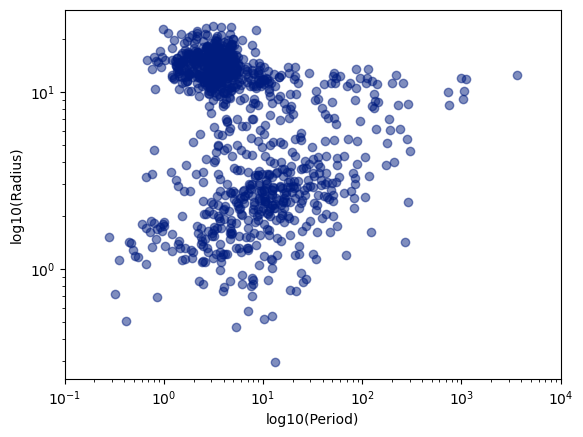

In [35]:
plt.plot(exo['pl_orbper'], exo['pl_rade'], 'o', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(Period)')
plt.ylabel('log10(Radius)')
plt.xlim(0.1, 10000)
plt.show()

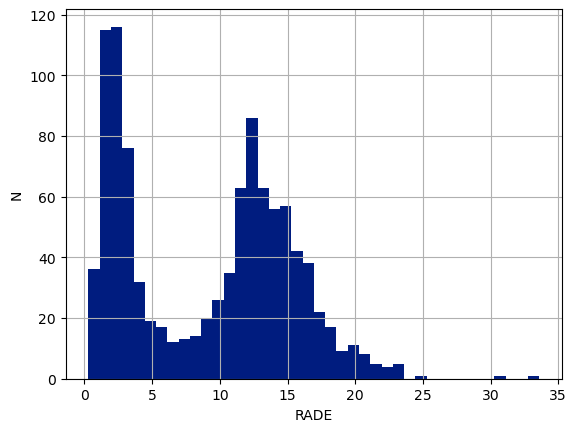

In [36]:
exo['pl_rade'].hist(bins=40)
plt.xlabel('RADE')
plt.ylabel('N')
plt.show()

Columns

In [37]:
exo.columns

Index(['pl_name', 'default_flag', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'st_logglim'],
      dtype='object')

In [38]:
# lets drop some columns that we don't need
exo2 = exo.drop(['pl_name', 'default_flag', 'pl_controv_flag', 
       'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 
       'pl_radelim', 'pl_bmasselim',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_raderr1', 'st_raderr2',
       'st_radlim','st_masserr1', 'st_masserr2', 'st_masslim',
       'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg', 'st_teff',
       'st_loggerr1', 'st_loggerr2', 'st_logglim'], axis=1)

###  This is the first set of features chosen:  
<b>pl_orbper:</b> orbital period  
<b>pl_orbsmax:</b> semi-major axis  
<b>pl_rade:</b> planet radius on units of earth radius  
<b>pl_bmasse:</b> planet mass or mass*sin(i)  
<b>pl_orbeccen:</b> orbital eccentricity  
<b>pl_eqt:</b> equilibrium temperature of planet  
<b>st_rad:</b> stellar radius  
<b>st_mass:</b> stellar mass  
<b>st_met:</b> stellar metalicity  


In [39]:
exo2.columns

Index(['pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'st_rad',
       'st_mass', 'st_met'],
      dtype='object')

The features that limit the number of points are pl_insol (insolation flux) and pl_eqt (equilibrium temperature).  
We probably will have to drop these.

In [40]:
exo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_orbper      2064 non-null   float64
 1   pl_orbpererr1  1950 non-null   float64
 2   pl_orbpererr2  1950 non-null   float64
 3   pl_orbsmax     1925 non-null   float64
 4   pl_rade        1020 non-null   float64
 5   pl_radeerr1    1001 non-null   float64
 6   pl_radeerr2    1001 non-null   float64
 7   pl_bmasse      2249 non-null   float64
 8   pl_bmasseerr1  2088 non-null   float64
 9   pl_bmasseerr2  2088 non-null   float64
 10  pl_orbeccen    1790 non-null   float64
 11  pl_insol       312 non-null    float64
 12  pl_eqt         715 non-null    float64
 13  st_rad         1660 non-null   float64
 14  st_mass        2223 non-null   float64
 15  st_met         1548 non-null   float64
dtypes: float64(16)
memory usage: 281.2 KB


In [41]:
# drop columns (columns that end with err are error bars, we don't need them)
exo2.drop(['pl_orbpererr1', 'pl_orbpererr2', 'pl_radeerr1', 'pl_radeerr2', 
        'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_orbeccen', 'pl_insol', 'pl_eqt'], axis=1, inplace=True)

In [42]:
# create a dataframe with only the rows that have a value for pl_rade (radius in units of earth radius), we will use this to train our model
# and other with the rest of the rows, we will use this as our data to predict
exo_data = exo2[exo2['pl_rade'].notna()]
exo_norad = exo2[~exo2['pl_rade'].notna()]

In [43]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 14 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   1005 non-null   float64
 1   pl_orbsmax  765 non-null    float64
 2   pl_rade     1020 non-null   float64
 3   pl_bmasse   1020 non-null   float64
 4   st_rad      1001 non-null   float64
 5   st_mass     1009 non-null   float64
 6   st_met      864 non-null    float64
dtypes: float64(7)
memory usage: 63.8 KB


In [44]:
# drop values with pl_bmasse greater than 3100 and pl_orbper greater than 60000 to avoid outliers
exo_data = exo_data[exo_data['pl_bmasse'] < 3100]
exo_norad = exo_norad[exo_norad['pl_bmasse'] < 3100]

exo_data = exo_data[exo_data['pl_orbper'] < 60000]
exo_norad = exo_norad[exo_norad['pl_orbper'] < 60000]


In [45]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 30 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   987 non-null    float64
 1   pl_orbsmax  734 non-null    float64
 2   pl_rade     987 non-null    float64
 3   pl_bmasse   987 non-null    float64
 4   st_rad      981 non-null    float64
 5   st_mass     982 non-null    float64
 6   st_met      849 non-null    float64
dtypes: float64(7)
memory usage: 61.7 KB


In [46]:
#drop rows with nan values
exo_data = exo_data[exo_data['st_met'].notna()]
#exo_data = exo_data[exo_data['st_logg'].notna()]
exo_data = exo_data[exo_data['st_rad'].notna()]
exo_data = exo_data[exo_data['st_mass'].notna()]
#exo_data = exo_data[exo_data['pl_eqt'].notna()]
exo_norad = exo_norad[exo_norad['st_met'].notna()]
#exo_norad = exo_norad[exo_norad['st_logg'].notna()]
exo_norad = exo_norad[exo_norad['st_rad'].notna()]
exo_norad = exo_norad[exo_norad['st_mass'].notna()]
#exo_norad = exo_norad[exo_norad['pl_eqt'].notna()]

In [47]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   847 non-null    float64
 1   pl_orbsmax  654 non-null    float64
 2   pl_rade     847 non-null    float64
 3   pl_bmasse   847 non-null    float64
 4   st_rad      847 non-null    float64
 5   st_mass     847 non-null    float64
 6   st_met      847 non-null    float64
dtypes: float64(7)
memory usage: 52.9 KB


In [48]:
# drop rows with no value of pl_orbper
exo_data = exo_data[exo_data['pl_orbper'].notna()]
exo_norad = exo_norad[exo_norad['pl_orbper'].notna()]

Finally our dataset is this

In [49]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   847 non-null    float64
 1   pl_orbsmax  654 non-null    float64
 2   pl_rade     847 non-null    float64
 3   pl_bmasse   847 non-null    float64
 4   st_rad      847 non-null    float64
 5   st_mass     847 non-null    float64
 6   st_met      847 non-null    float64
dtypes: float64(7)
memory usage: 52.9 KB


Plot correlation between features, values represent the Pearson coefficient, the closer to 1 the stronger the correlation

<AxesSubplot:>

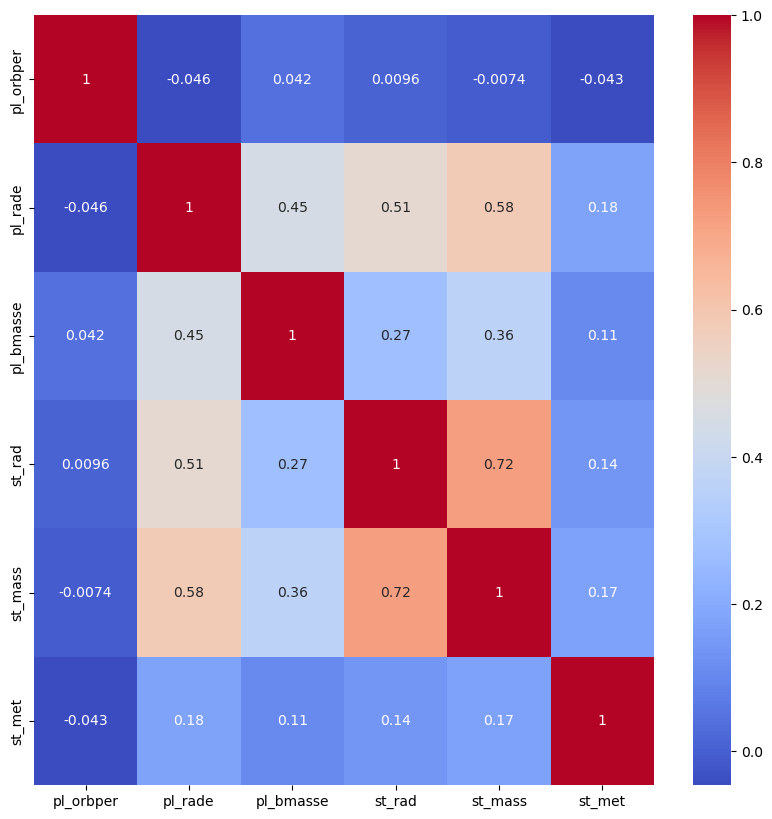

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(exo_data.corr(), annot=True, cmap='coolwarm')

Drop the semi-major axis feature because is highly correlated with the orbital period (as expected)  
and has less non-null values.

In [52]:
exo_data = exo_data.drop(['pl_orbsmax'], axis=1)
exo_norad = exo_norad.drop(['pl_orbsmax'], axis=1)


Finally, this are our datasets for training (exo_data) and to predict (exo_norad):

In [55]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  847 non-null    float64
 1   pl_rade    847 non-null    float64
 2   pl_bmasse  847 non-null    float64
 3   st_rad     847 non-null    float64
 4   st_mass    847 non-null    float64
 5   st_met     847 non-null    float64
dtypes: float64(6)
memory usage: 46.3 KB


In [56]:
exo_norad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 2 to 2248
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  509 non-null    float64
 1   pl_rade    0 non-null      float64
 2   pl_bmasse  509 non-null    float64
 3   st_rad     509 non-null    float64
 4   st_mass    509 non-null    float64
 5   st_met     509 non-null    float64
dtypes: float64(6)
memory usage: 27.8 KB


Import machine learning library sklearn and functions

In [59]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We will use supervised learning, where our "labels" will be the radius (pl_rade).  
Let's save it in a column named "t", and "X" will be our training dataset.

In [57]:
# save the target column for training and drop it from the noradius dataset
t = exo_data['pl_rade']
X = exo_data.drop(['pl_rade'], axis=1)

# drop the empty column 'pl_rade' from the dataset where we will predict the radius later.
exo_norad = exo_norad.drop(['pl_rade'], axis=1)


Now we need to split our training dataset in train and test sets,  
I'll take a 20% of the points for testing.

In [60]:
# split data into train and test
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)


Now let's scale the features. 
This is done to prevent very different ranges of values in the features affecting the algorithms.  
It "normalizes" the variables by removing the mean and dividing by the standard deviation.  
First we fit it on X_train and then transform whatever we want to scale with the same object.

In [61]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


I choose a RandomForestRegressor as it is a very powerful non-linear algorithm for regression  
and allows us to see feature importances.  
As metric we will use the mean squared error and the R2 coefficient for scoring.

In [62]:
# create a random forest model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [63]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, t_train)

# predict the target values
t_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(t_test, t_pred)
print('Mean squared error: ', mse)

# calculate the r2 score
r2 = r2_score(t_test, t_pred)
print('R2 score: ', r2)

Mean squared error:  5.603494903615292
R2 score:  0.8520256956794912


Text(0, 0.5, 'Predicted values')

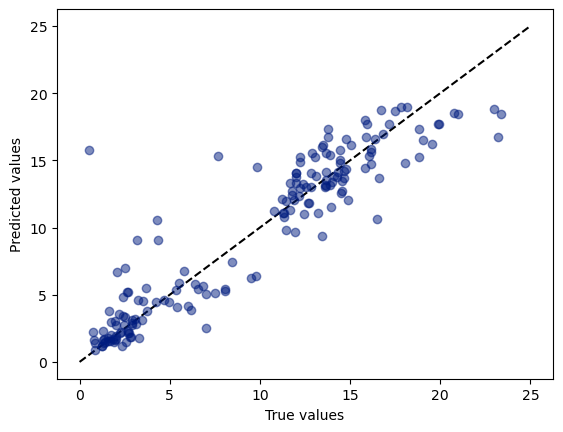

In [64]:
# plot the predicted values against the true values
plt.plot(t_test, t_pred, 'o', alpha=0.5)
x=np.linspace(0, 25, 100)
plt.plot(x, x, '--k', zorder=-1)
plt.xlabel('True values')
plt.ylabel('Predicted values')


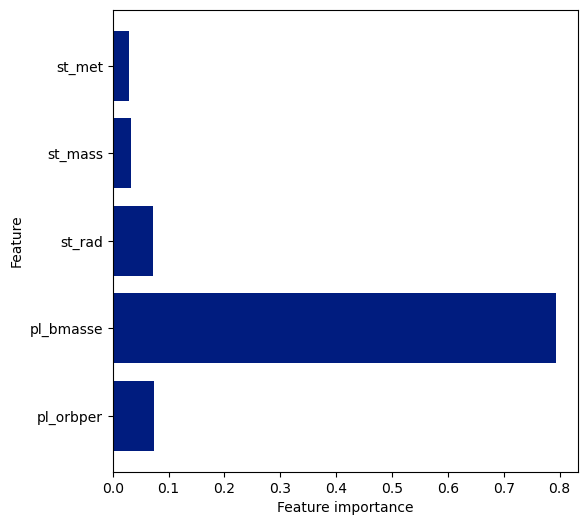

In [65]:
# plot the feature importances
plt.figure(figsize=(6,6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()


Let's now use cross-validation to find the best hyperparameters for our RF model to see  
if we can improve the performance a bit more

In [66]:
# search for the best parameters for the random forest model
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': np.arange(50, 651, 50),
              'max_depth': np.arange(1, 21, 2),
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 4],
              'max_features': [1.0, 'sqrt'],
              'max_leaf_nodes': [None, 2, 4, 6, 8, 10]
              }

rfgs = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rfgs.fit(X_train, t_train)
print(rfgs.best_params_)
print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mean_squared_error(t_train, rfgs.predict(X_train)))))
print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mean_squared_error(t_test, rfgs.predict(X_test)))))
print('CV SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-rfgs.best_score_)))

{'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE (train): 829.7750 m/s
Best RMSE (test) : 2184.9471 m/s
CV SCORE [m/s]: 2146.549


In [67]:
# re train the model with the best parameters
model = RandomForestRegressor(random_state=42, max_depth=13, max_features='sqrt', max_leaf_nodes=None,
                              min_samples_leaf=1, min_samples_split=2, n_estimators=200)
model.fit(X_train, t_train)

# predict the target values
t_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(t_test, t_pred)
print('Mean squared error: ', mse)

# calculate the r2 score
r2 = r2_score(t_test, t_pred)
print('R2 score: ', r2)

Mean squared error:  4.77399388893865
R2 score:  0.8739307455976661


We improved the score and the mse.  
Now let's compare with a GB model.

In [80]:
# create a gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
# train the model
# we'll use early stopping setting a validation fraction of 0.1
params = {
    'validation_fraction': 0.1,
    'n_iter_no_change': 20,
    'tol': 0.0001,
    'random_state': 42
}

model_gb = GradientBoostingRegressor(**params)
model_gb.fit(X_train, t_train)

# predict the target values
t_pred_gb = model_gb.predict(X_test)

# calculate the mean squared error
mse_gb = mean_squared_error(t_test, t_pred_gb)
print('Mean squared error: ', mse_gb)

# calculate the r2 score
r2_gb = r2_score(t_test, t_pred_gb)
print('R2 score: ', r2_gb)

Mean squared error:  5.516275581203175
R2 score:  0.8543289401330396


In [88]:
# search for the best parameters for the gradient boosting model
from sklearn.model_selection import GridSearchCV
gradb = GradientBoostingRegressor(random_state=42)
param_grid = {
              'n_estimators': [500],
              'learning_rate': np.arange(0.01, 0.21, 0.01),
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'validation_fraction': [0.1],
              'n_iter_no_change': [20],
              'tol': [0.0001],
              'max_depth': [3, 5, 7],
              'max_leaf_nodes': [None, 2, 4, 6],
              }

gradb_s = GridSearchCV(gradb, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)
gradb_s.fit(X_train, t_train)
print(gradb_s.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_iter_no_change': 20, 'tol': 0.0001, 'validation_fraction': 0.1}


In [87]:
# re-train with best parameters
from sklearn.ensemble import GradientBoostingRegressor
# train the model
params = {
    'learning_rate': 0.05,
    'max_depth': 3,
    'max_leaf_nodes': None,
    'n_estimators': 500,
    'validation_fraction': 0.1,
    'n_iter_no_change': 20,
    'tol': 0.0001,
    'random_state': 42
}

model_gb = GradientBoostingRegressor(**params)
model_gb.fit(X_train, t_train)

# predict the target values
t_pred_gb = model_gb.predict(X_test)

# calculate the mean squared error
mse_gb = mean_squared_error(t_test, t_pred_gb)
print('Mean squared error: ', mse_gb)

# calculate the r2 score
r2_gb = r2_score(t_test, t_pred_gb)
print('R2 score: ', r2_gb)

Mean squared error:  5.434354340546654
R2 score:  0.8564922754806636


It doesn't look better than our RF.

Now let's use our training model to predict the radius of our dataset of the  
planets that don't have their radius determined.

In [90]:
# scaling the data
norad = scaler.transform(exo_norad)
# predict 
norad_predict = model.predict(norad)

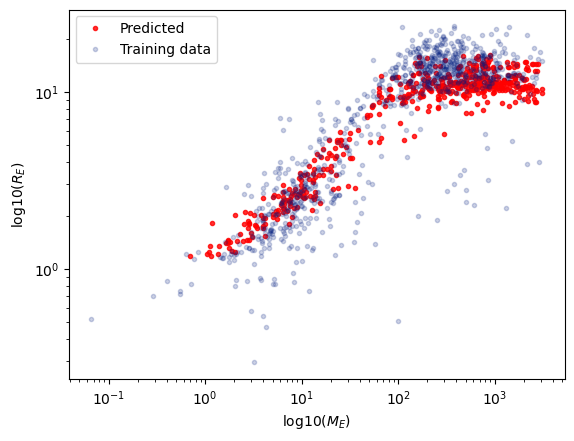

In [92]:
# plot mass vs radius for the predicted dataset and the training dataset
plt.plot(exo_norad['pl_bmasse'], norad_predict, 'o', color='red', ms=3, alpha=0.8, label='Predicted')
plt.plot(exo_data['pl_bmasse'], t, 'o', ms=3, alpha=0.2, label='Training data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10($M_E$)')
plt.ylabel('log10($R_E$)')
plt.legend(loc='best')
plt.show()

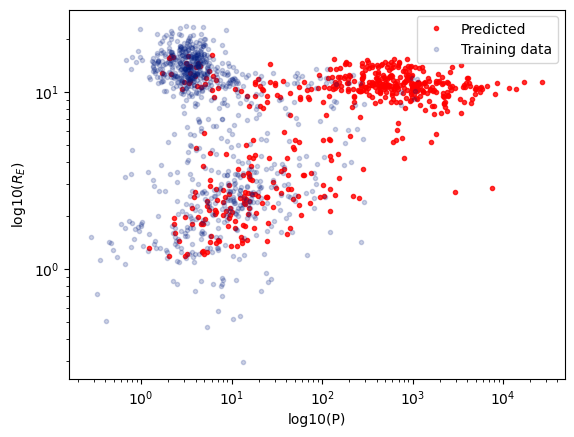

In [93]:
# plot period vs radius for the predicted dataset and the training dataset
plt.plot(exo_norad['pl_orbper'], norad_predict, 'o', color='red', ms=3, alpha=0.8, label='Predicted')
plt.plot(exo_data['pl_orbper'], t, 'o', ms=3, alpha=0.2, label='Training data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(P)')
plt.ylabel('log10($R_E$)')
plt.legend(loc='best')
plt.show()


Now lets plot with the limits of the Neptunian desert to see where our planets fall

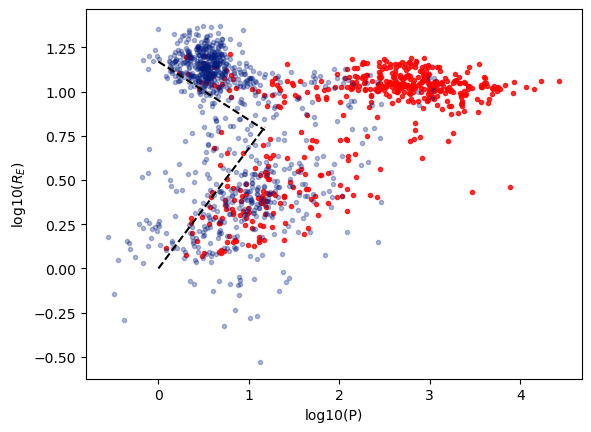

In [96]:
# add the limits of the Neptunian Desert as defined by Mazeh et al. 2016
# for the P vs RadE plot
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(1,15,100)
plt.plot(np.log10(exo_norad['pl_orbper']), np.log10(norad_predict), 'o', color='red', markersize=3, alpha=0.8)
plt.plot(np.log10(exo_data['pl_orbper']), np.log10(exo_data['pl_rade']), 'o', markersize=3, alpha=0.3)
plt.plot(np.log10(x),des3(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des4(np.log10(x)), color='black', linestyle='--')
plt.xlabel('log10(P)')
plt.ylabel('log10($R_E$)')
plt.show()

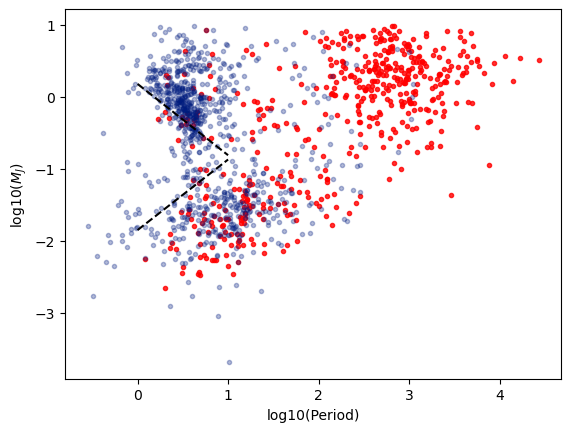

In [97]:
# add the limits of the Neptunian Desert as defined by Mazeh et al. 2016
# for the period vs M_J plot
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,10,100)
plt.plot(np.log10(exo_norad['pl_orbper']), np.log10(exo_norad['pl_bmasse']*0.00314558), 'o', color='red', markersize=3, alpha=0.8)
plt.plot(np.log10(exo_data['pl_orbper']), np.log10(exo_data['pl_bmasse']*0.00314558), 'o', markersize=3, alpha=0.3)
plt.plot(np.log10(x),des1(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des2(np.log10(x)), color='black', linestyle='--')
plt.xlabel('log10(Period)')
plt.ylabel('log10($M_J$)')
plt.show()

Let's identify the planets that are in the Neptunian Desert in the first plot

In [98]:

k=0
indexes = []
names = []
for i,j in zip(norad_predict, exo_norad['pl_orbper']):
    if np.log10(i) < des3(np.log10(j)) and np.log10(i) > des4(np.log10(j)):
        indexes.append(k)
        names.append(exo_norad.iloc[k].name)
        print('valor: '+str(i))
    k=k+1

valor: 1.9412701176470575
valor: 1.7973683392857134
valor: 1.307039551087801
valor: 2.541313899636912
valor: 3.823291666666669
valor: 2.70355141033966
valor: 4.800029166666664
valor: 5.8992837499999995
valor: 10.348815370798315
valor: 4.509633452380948
valor: 4.482163658263304


In [99]:
# print the parameters and names of these planets
for i in names:
    print('index:', i, ', name: ', exo.loc[i]['pl_name'], ', log10(P): ', np.log10(exo_norad.loc[i]['pl_orbper']), 
    ', log10(mass_j): ', np.log10(exo_norad.loc[i]['pl_bmasse']*0.00314558))


index: 71 , name:  CD Cet b , log10(P):  0.3599682158259049 , log10(mass_j):  -1.9057021695125878
index: 131 , name:  G 264-012 b , log10(P):  0.36274252117951544 , log10(mass_j):  -2.1043592564670104
index: 165 , name:  GJ 3138 b , log10(P):  0.08637050991595242 , log10(mass_j):  -2.251879262830154
index: 255 , name:  Gl 378 b , log10(P):  0.5822906827189941 , log10(mass_j):  -1.3876882809068747
index: 783 , name:  HD 213885 c , log10(P):  0.6798846649537431 , log10(mass_j):  -1.202356365116281
index: 790 , name:  HD 215497 b , log10(P):  0.5948387713664802 , log10(mass_j):  -1.6990743815768294
index: 964 , name:  HD 47186 b , log10(P):  0.6111389003956459 , log10(mass_j):  -1.1550063372265538
index: 974 , name:  HD 49674 b , log10(P):  0.6943743912514695 , log10(mass_j):  -1.0001043772408107
index: 999 , name:  HD 63454 b , log10(P):  0.4499486944267991 , log10(mass_j):  -0.602164368568773
index: 1044 , name:  HD 77338 b , log10(P):  0.7586167139759268 , log10(mass_j):  -1.2219531268

From these, lets see which ALSO fall in the desert in the second plot

In [107]:
for i in names:
    if np.log10(exo_norad.loc[i]['pl_bmasse']*0.00314558) < des2(np.log10(exo_norad.loc[i]['pl_orbper'])) and np.log10(exo_norad.loc[i]['pl_bmasse']*0.00314558) > des1(np.log10(exo_norad.loc[i]['pl_orbper'])):
        print('index: '+str(i))

index: 964
index: 974
index: 999


In conclusion, we found 3 planets that could be in the Neptunian desert acording to our prediction,  
the names of these planets are:

In [108]:
for i in [964, 974, 2017]:
    print(exo.loc[i]['pl_name'])

HD 47186 b
HD 49674 b
WASP-107 b
